# Classifying unknown ancestry

### Author: Chris Porras

In [1]:
################### Run this cell to load essential packages #####################
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
rc = {'lines.linewidth': 3, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)
sns.set_palette('colorblind')
%matplotlib inline

In [2]:
### Load in data files
df = pd.read_csv('../data/1K_genomes_PCA.csv')
PC_load = np.load('../data/1kGenomesPCloading.npy')
superpop_key = pd.read_csv("../data/20131219.superpopulations.tsv", sep='\t')
pop_key = pd.read_csv('../data/20131219.populations.tsv',sep='\t').iloc[:,0:3]

### K Nearest Neighbors classification on 1KGenomes PCA

In [11]:
from sklearn.neighbors import KNeighborsClassifier

#### Testing with explicitly defined subsets for train & test

In [81]:
### Choose a subset of features (PCs) skipping UNKNOWN 1
X = df.loc[:,df.columns.str.contains('PC')]
X_test = X.loc[1:3]
X_train = X.loc[3:]
### Choose target from df -> 'Population'
y = df['Population']
y_test = y.loc[1:3]
y_train = y.loc[3:]

In [83]:
## train, fit, and predict population on test subset
k_max = 10
knn = KNeighborsClassifier(n_neighbors=k_max)
knn.fit(X_train,y_train)
print(f'predicted population: {knn.predict(X_test)} \n' + \
      f'actual: {np.array(y_test)}') 

predicted population: ['GBR' 'IBS' 'TSI'] 
actual: ['GBR' 'GBR' 'GBR']


#### Test randomly generated subsets with `train_test_split()`

In [99]:
from sklearn.model_selection import train_test_split

##### simple knn + accuracy plot

In [163]:
def my_knn(X,y,title_label='',test_size=0.33):
    ## create random train and test subsets 
    X_train, X_test, y_train, y_test = train_test_split( \
    X, y, test_size=test_size, random_state=1)
    ## train, fit, and predict population on test subset
    # pre-allocate arrays for k and accuracy
    k_max = 400
    k_arr = np.arange(1,k_max+1)
    accur = np.zeros(k_max)
    ## loop through range of k's
    for i, k  in enumerate(k_arr):
        ## fit knn model for each k
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred = knn.predict(X_test)
        ## Calculate accuracy by comparison to known 
        accur[i] = np.mean(y_pred == y_test)
    ## plot accuracy vs. k
    plt.plot(k_arr,accur)
    plt.title('Prediction accuracy vs. k for KNN: ' + title_label)
    ## Report optimal k
    k_optim = np.argmax(accur)+1
    accur_optim = np.max(accur)
    print(f'best k: {k_optim}\n with max accuracy {accur_optim}')

##### Classifying by super populations

best k: 10
 with accuracy 0.9709794437726723


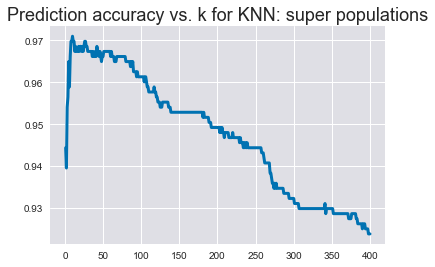

In [161]:
### Choose a subset of features (PCs) skipping UNKNOWN 1
X = df.loc[:,df.columns.str.contains('PC')]
### Choose prediction target from df 
y = df['Super_Population']

my_knn(X,y,title_label='super populations')

##### Classifying by sub populations

best k: 25
 with accuracy 0.33978234582829503


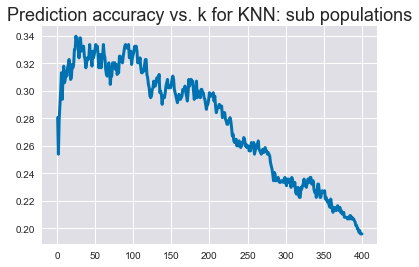

In [162]:
### Choose a subset of features (PCs) skipping UNKNOWN 1
X = df.loc[:,df.columns.str.contains('PC')]
### Choose target from df -> 'Population'
y = df['Population']

my_knn(X,y,title_label='sub populations')

##### Try with only first 2 PCs

best k: 13
 with max accuracy 0.9153567110036276


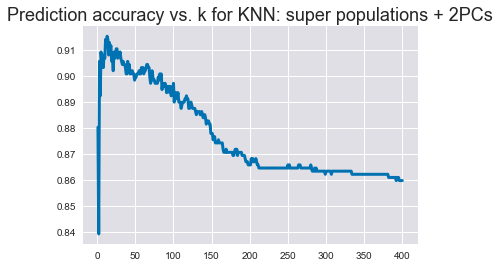

In [175]:
### Choose first 2 PCs
X = df.iloc[:,1:3]
### Choose prediction target from df 
y = df['Super_Population']

my_knn(X,y,title_label='super populations + 2PCs')

best k: 53
 with max accuracy 0.3083434099153567


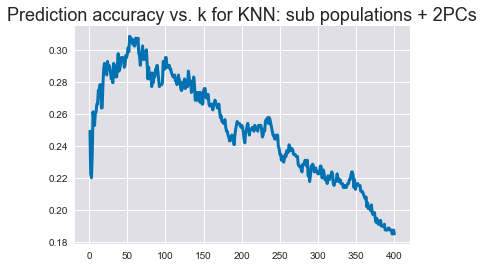

In [177]:
### Choose first 2 PCs
X = df.iloc[:,1:3]
### Choose target from df -> 'Population'
y = df['Population']

my_knn(X,y,title_label='sub populations + 2PCs')